In [ ]:
import pandas as pd 
import numpy as np
import scipy as sp
#import chart_studio.plotly as py
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.figure_factory as ff
import seaborn as sn
from matplotlib import pyplot as plt
import seaborn as sns # data visualization library 

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



In [ ]:
pip install catboost

     |████████████████████████████████| 64.8MB 61kB/s 


Import Data


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Breast Cancer Data.csv to Breast Cancer Data.csv


Read Data


In [ ]:
Data = pd.read_csv('Breast Cancer Data.csv')

In [ ]:
Data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
Data.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [ ]:
Data.columns
Data.drop(['id'],axis=1,inplace=True)

In [ ]:
Data.shape

(569, 31)

Diagnosis Histogram

In [ ]:
fig = px.histogram(Data, x="diagnosis")
fig.show()

Features Correlation HeatMap

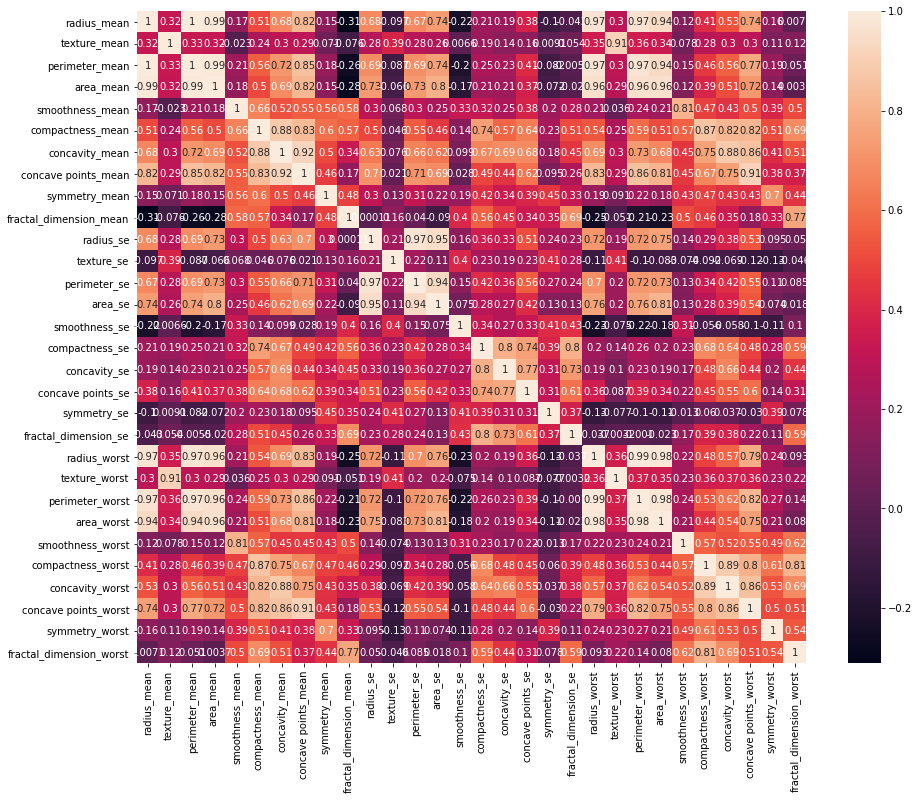

In [ ]:
fig, ax = plt.subplots(figsize=(15,12))
sn.heatmap(Data.corr(),ax=ax,annot=True)

Swarm Plots


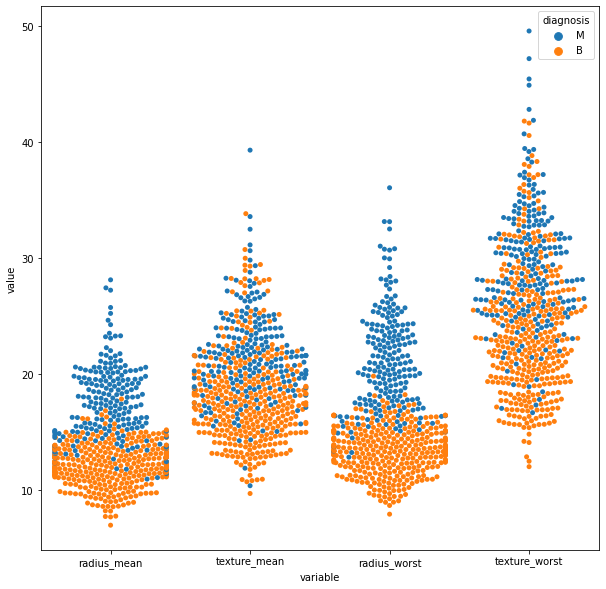

In [ ]:
melted_data_1 = pd.melt(Data,id_vars = "diagnosis",value_vars = ['radius_mean', 'texture_mean','radius_worst',	'texture_worst'])
plt.figure(figsize = (10,10))
sns.swarmplot(x = "variable", y = "value", hue="diagnosis",data= melted_data_1)
plt.show()

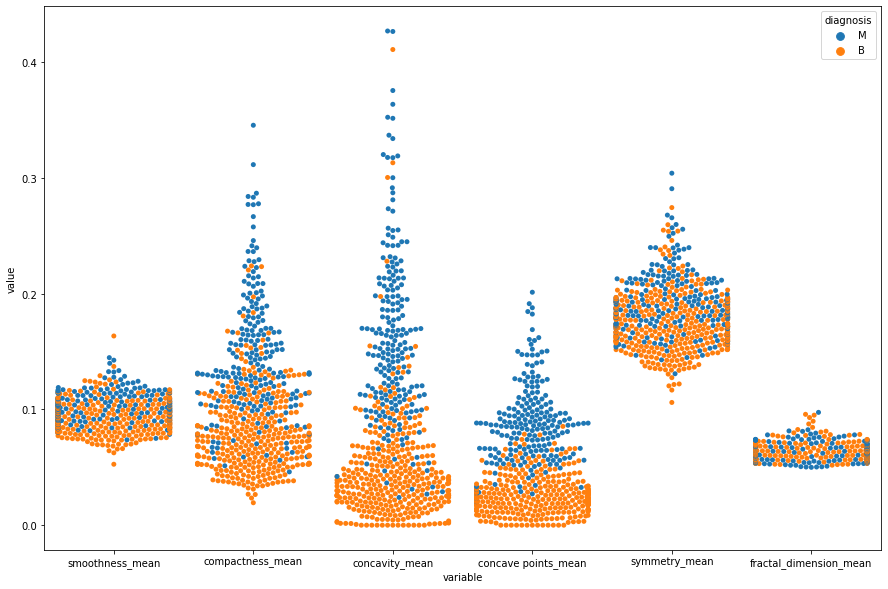

In [ ]:
melted_data_2 = pd.melt(Data,id_vars = "diagnosis",value_vars = ['smoothness_mean','compactness_mean','concavity_mean',	'concave points_mean',	'symmetry_mean',	'fractal_dimension_mean'])
plt.figure(figsize = (15,10))
sns.swarmplot(x = "variable", y = "value", hue="diagnosis",data= melted_data_2)
plt.show()

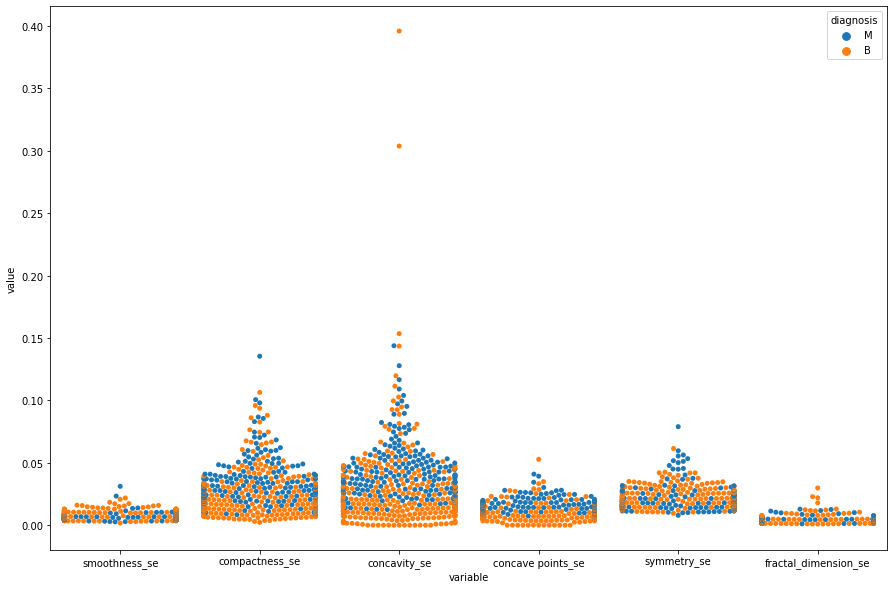

In [ ]:
melted_data_3 = pd.melt(Data,id_vars = "diagnosis",value_vars = ['smoothness_se'	,'compactness_se',	'concavity_se',	'concave points_se'	,'symmetry_se'	,'fractal_dimension_se'])
plt.figure(figsize = (15,10))
sns.swarmplot(x = "variable", y = "value", hue="diagnosis",data= melted_data_3)
plt.show()

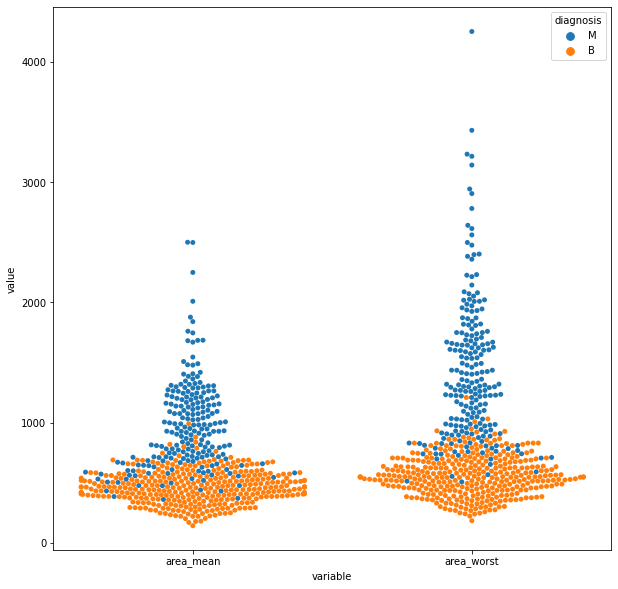

In [ ]:
melted_data_4 = pd.melt(Data,id_vars = "diagnosis",value_vars = ['area_mean' ,'area_worst'])
plt.figure(figsize = (10,10))
sns.swarmplot(x = "variable", y = "value", hue="diagnosis",data= melted_data_4)
plt.show()

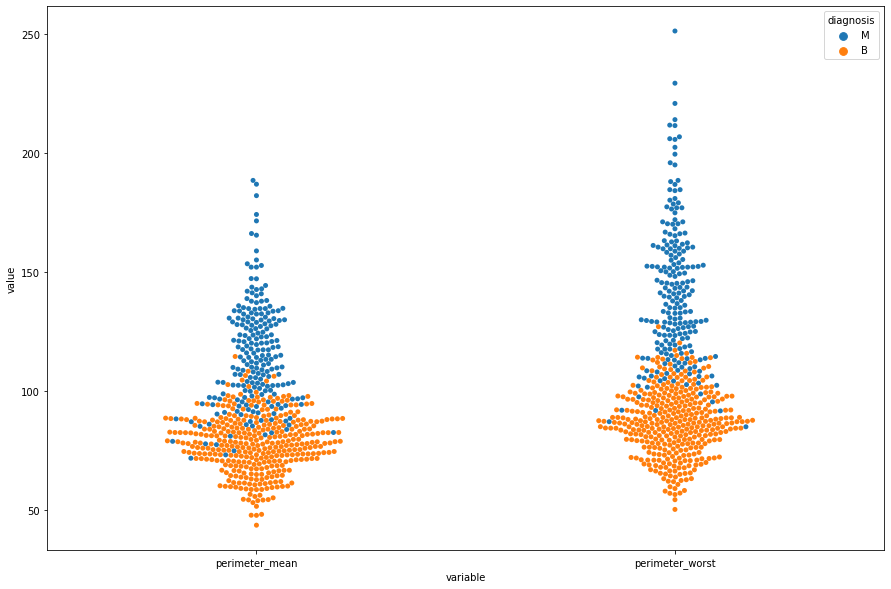

In [ ]:
melted_data_5 = pd.melt(Data,id_vars = "diagnosis",value_vars = ['perimeter_mean' ,'perimeter_worst'])
plt.figure(figsize = (15,10))
sns.swarmplot(x = "variable", y = "value", hue="diagnosis",data= melted_data_5)
plt.show()

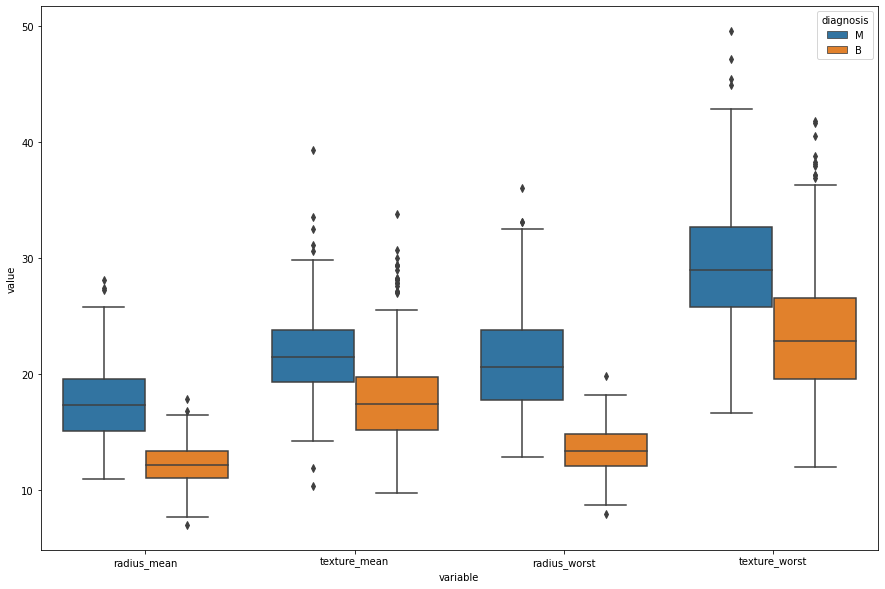

In [ ]:
melted_data_1 = pd.melt(Data,id_vars = "diagnosis",value_vars = ['radius_mean', 'texture_mean','radius_worst',	'texture_worst'])
plt.figure(figsize = (15,10))
sns.boxplot(x = "variable", y = "value", hue="diagnosis",data= melted_data_1)
plt.show()

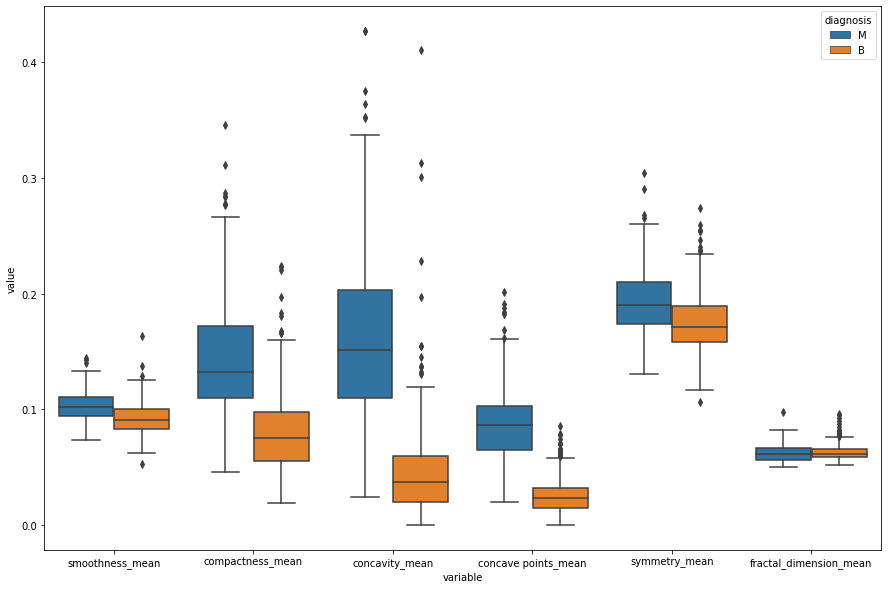

In [ ]:

melted_data_2 = pd.melt(Data,id_vars = "diagnosis",value_vars = ['smoothness_mean','compactness_mean','concavity_mean',	'concave points_mean',	'symmetry_mean',	'fractal_dimension_mean'])
plt.figure(figsize = (15,10))
sns.boxplot(x = "variable", y = "value", hue="diagnosis",data= melted_data_2)
plt.show()

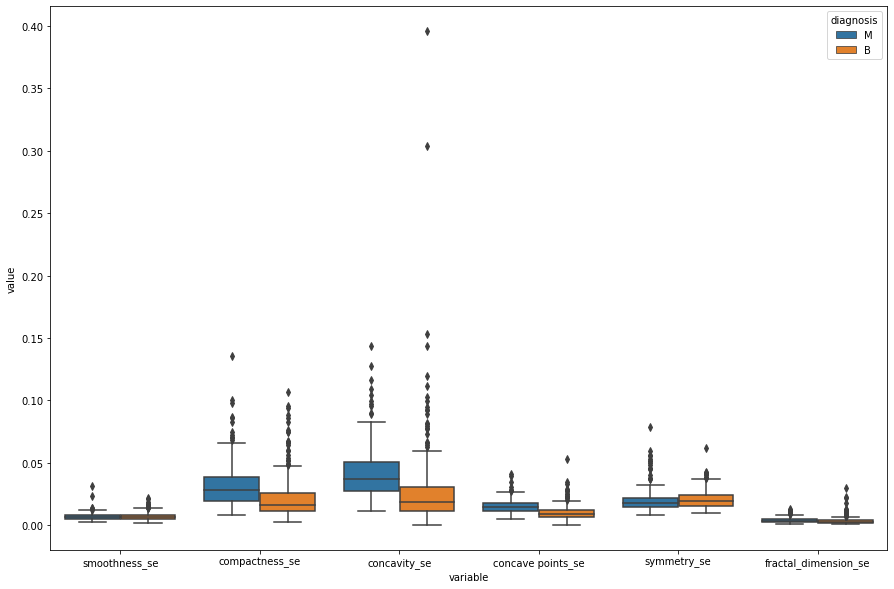

In [ ]:
melted_data_3 = pd.melt(Data,id_vars = "diagnosis",value_vars = ['smoothness_se'	,'compactness_se',	'concavity_se',	'concave points_se'	,'symmetry_se'	,'fractal_dimension_se'])
plt.figure(figsize = (15,10))
sns.boxplot(x = "variable", y = "value", hue="diagnosis",data= melted_data_3)
plt.show()

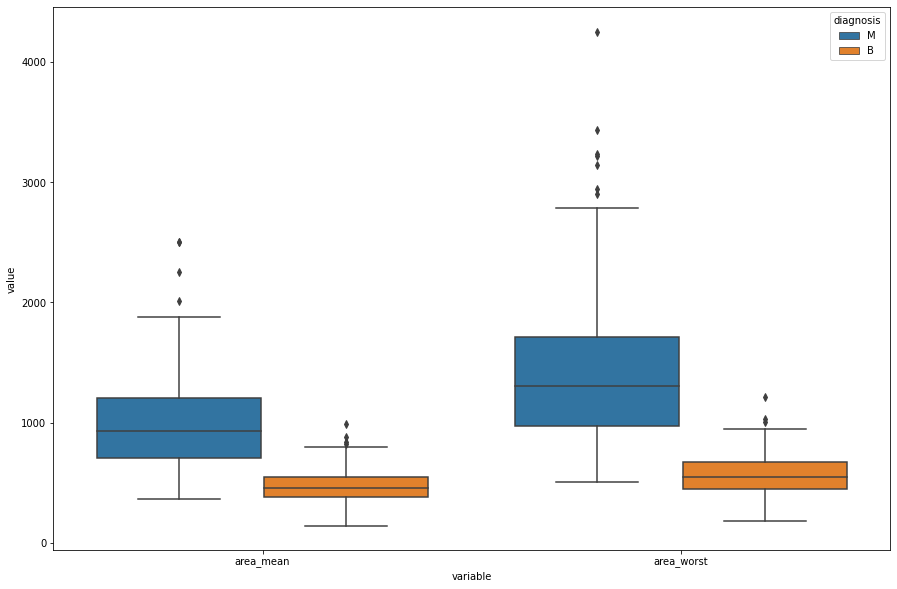

In [ ]:
melted_data_4 = pd.melt(Data,id_vars = "diagnosis",value_vars = ['area_mean' ,'area_worst'])
plt.figure(figsize = (15,10))
sns.boxplot(x = "variable", y = "value", hue="diagnosis",data= melted_data_4)
plt.show()

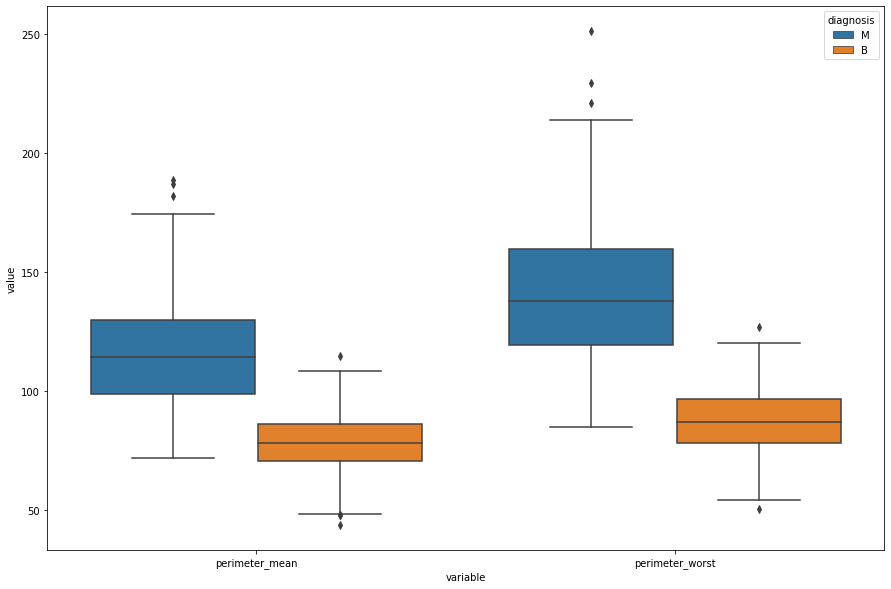

In [ ]:
melted_data_5 = pd.melt(Data,id_vars = "diagnosis",value_vars = ['perimeter_mean' ,'perimeter_worst'])
plt.figure(figsize = (15,10))
sns.boxplot(x = "variable", y = "value", hue="diagnosis",data= melted_data_5)
plt.show()

In [ ]:
Y=Data['diagnosis'].map({'B':0,'M':1})
X=Data.drop('diagnosis',axis=1)


Distribution

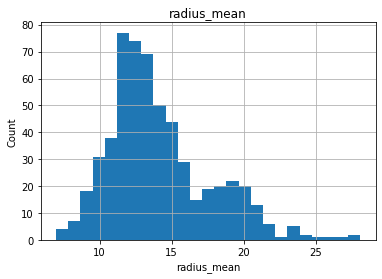

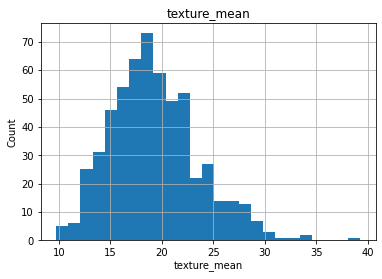

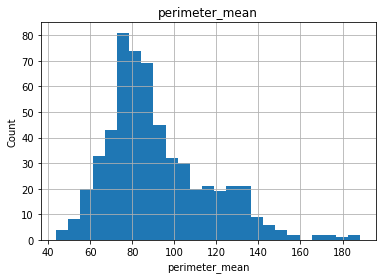

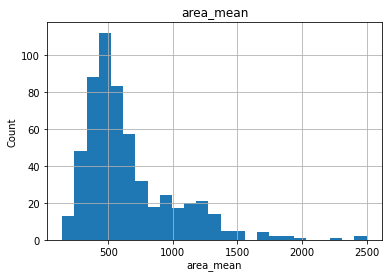

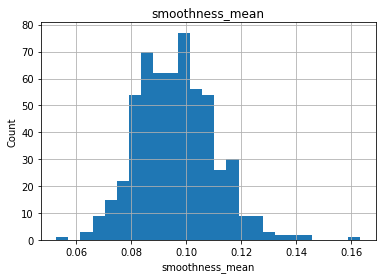

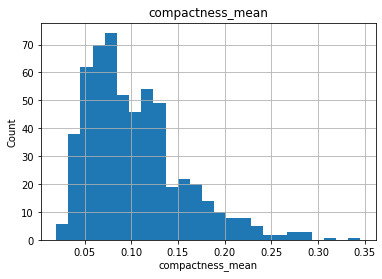

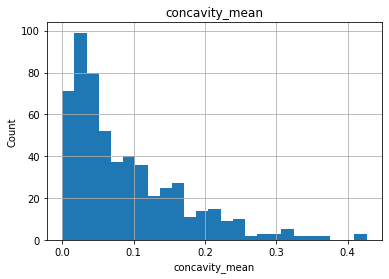

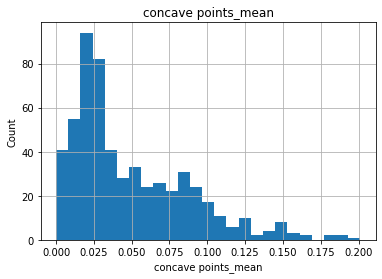

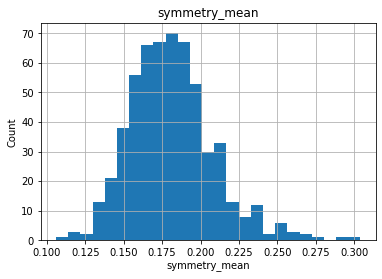

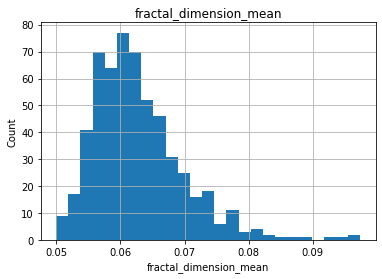

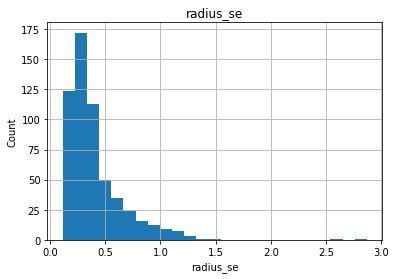

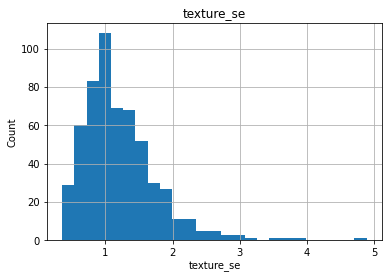

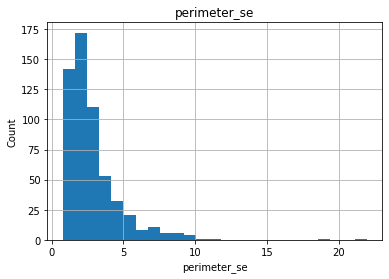

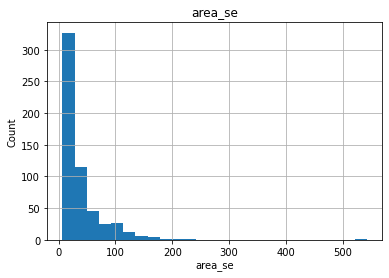

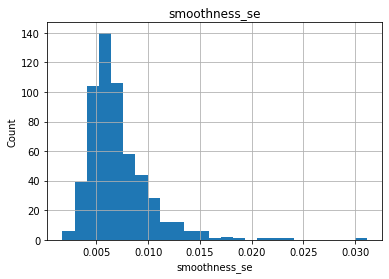

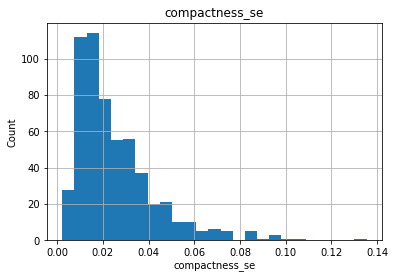

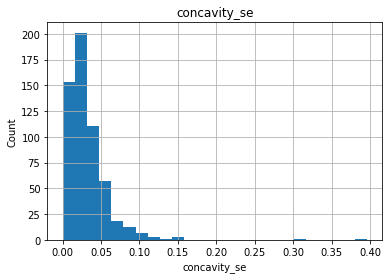

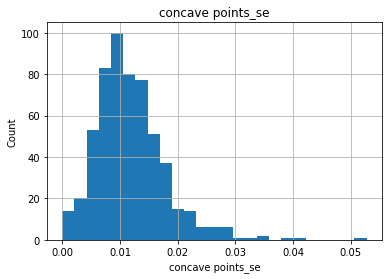

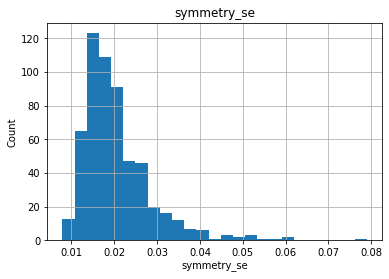

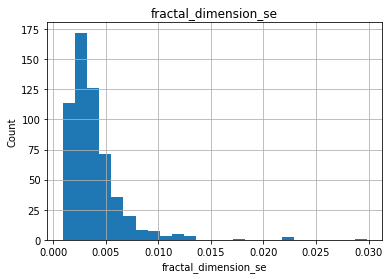

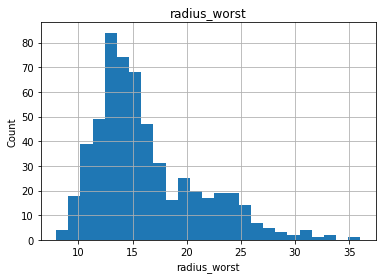

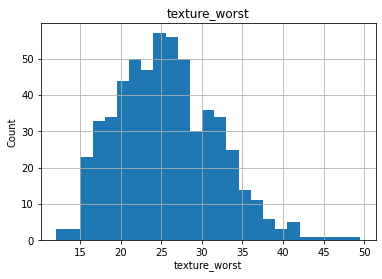

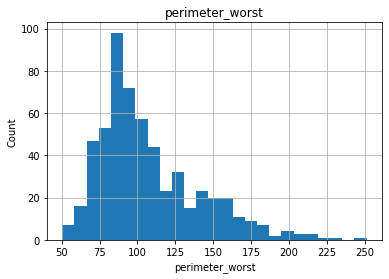

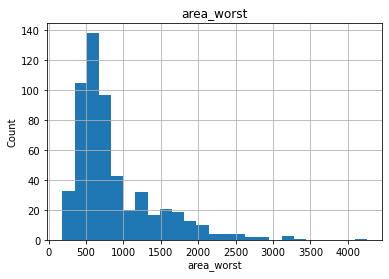

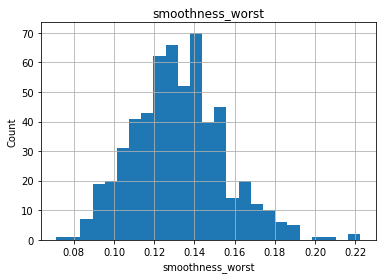

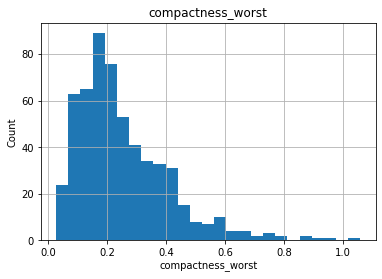

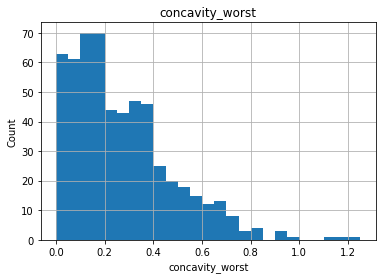

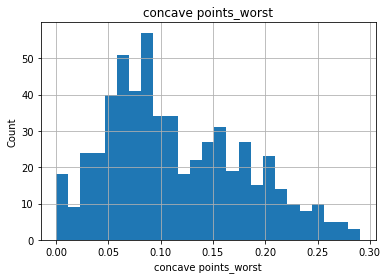

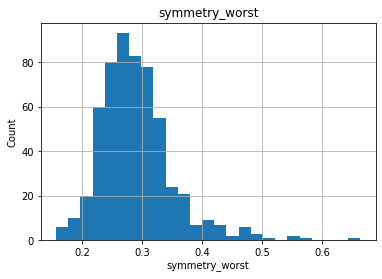

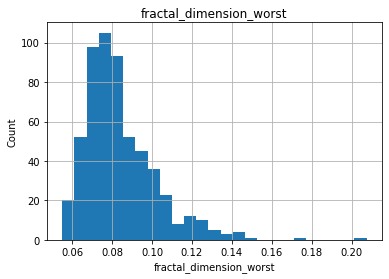

In [ ]:
continuous_feature = X.columns
for feature in continuous_feature:
    X[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

In [ ]:
sns.pairplot(Data, hue="diagnosis")

Output hidden; open in https://colab.research.google.com to view.

K-Best Features


In [ ]:
#apply SelectKBest class to extract top 10 best features
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
bestfeatures = SelectKBest(score_func=chi2, k=25)
fit = bestfeatures.fit(X,Y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score'] 
print(featureScores.nlargest(15,'Score'))
fs=featureScores.nlargest(10,'Score')

                   Specs          Score
23            area_worst  112598.431564
3              area_mean   53991.655924
13               area_se    8758.504705
22       perimeter_worst    3665.035416
2         perimeter_mean    2011.102864
20          radius_worst     491.689157
0            radius_mean     266.104917
12          perimeter_se     250.571896
21         texture_worst     174.449400
1           texture_mean      93.897508
26       concavity_worst      39.516915
10             radius_se      34.675247
6         concavity_mean      19.712354
25     compactness_worst      19.314922
27  concave points_worst      13.485419


In [ ]:
fig = px.bar(fs, x='Specs', y='Score',
             hover_data=['Score'],
             labels={'pop':'Feature Importance'}, height=400)
fig.show()

In [ ]:
top_features=fs['Specs'].values.tolist()
X_2=X[top_features]
X_2.head()

,area_worst,area_mean,area_se,perimeter_worst,perimeter_mean,radius_worst,radius_mean,perimeter_se,texture_worst,texture_mean
0,2019.0,1001.0,153.40,184.60,122.80,25.38,17.99,8.589,17.33,10.38
1,1956.0,1326.0,74.08,158.80,132.90,24.99,20.57,3.398,23.41,17.77
2,1709.0,1203.0,94.03,152.50,130.00,23.57,19.69,4.585,25.53,21.25
3,567.7,386.1,27.23,98.87,77.58,14.91,11.42,3.445,26.50,20.38
4,1575.0,1297.0,94.44,152.20,135.10,22.54,20.29,5.438,16.67,14.34


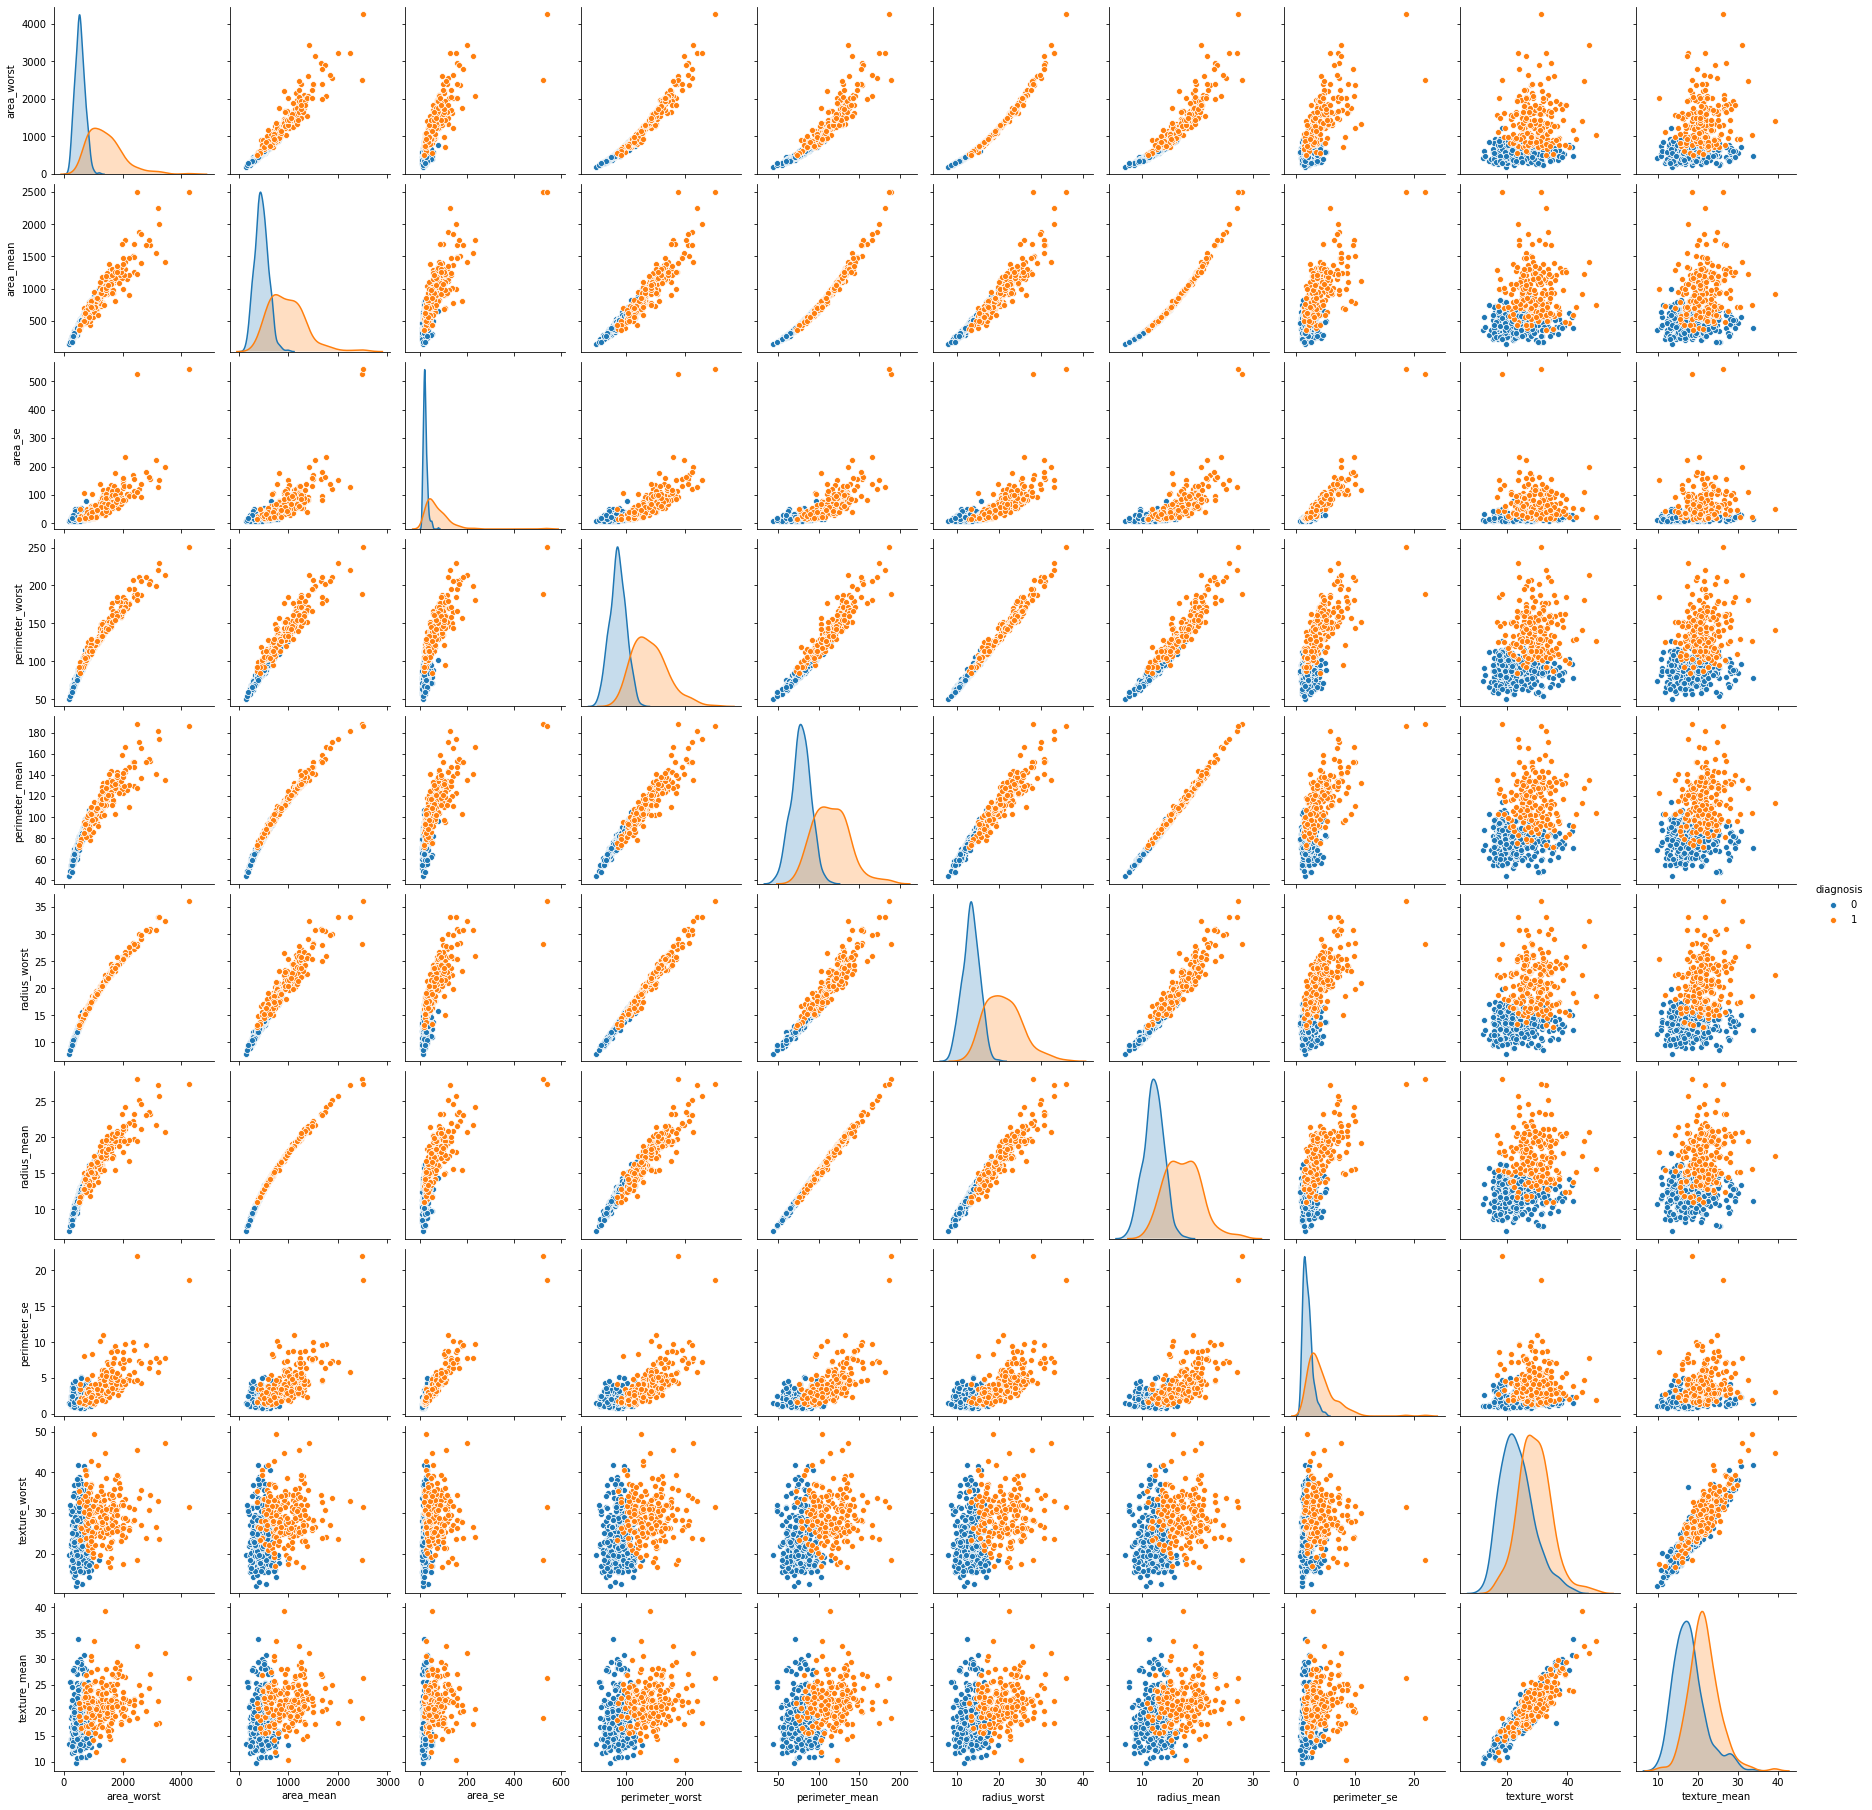

In [ ]:
plot=pd.concat([Y,X[top_features]],axis=1)
sns.pairplot(plot, hue="diagnosis")

Pipelines


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from catboost import CatBoostClassifier
import xgboost

Splitting of Data

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X_2,Y,test_size=0.3,random_state=0)

In [ ]:
pipeline_xg=Pipeline([('xg_classifier',xgboost.XGBClassifier())])

In [ ]:
pipeline_cat=Pipeline([('cat_classifier',CatBoostClassifier())])

In [ ]:
pipeline_lda=Pipeline([('lda_classifier',LinearDiscriminantAnalysis())])

In [ ]:
pipeline_ada=Pipeline([('ada_classifier',AdaBoostClassifier())])

In [ ]:
pipeline_et=Pipeline([('et_classifier',ExtraTreesClassifier())])

In [ ]:
pipeline_lr=Pipeline([('lr_classifier',LogisticRegression(random_state=0))])

In [ ]:
pipeline_dt=Pipeline([('dt_classifier',DecisionTreeClassifier())])

In [ ]:
pipeline_randomforest=Pipeline([('rf_classifier',RandomForestClassifier())])

In [ ]:
# list of pipelines
pipelines = [pipeline_lr, pipeline_dt, pipeline_randomforest, pipeline_et, pipeline_ada, pipeline_lda, pipeline_cat, pipeline_xg]

In [ ]:
best_accuracy=0.0
best_classifier=0
best_pipeline=""

In [ ]:
# Dictionary of pipelines and classifier types for ease of reference
pipe_dict = {0: 'Logistic Regression', 1: 'Decision Tree', 2: 'RandomForest',3:'Extra Tree', 4:'Ada Boost', 5:'LDA', 6:'CatBoost',7:'XGBoost'}

# Fit the pipelines
for pipe in pipelines:
	pipe.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



Learning rate set to 0.006952
0:	learn: 0.6845414	total: 3.38ms	remaining: 3.38s
1:	learn: 0.6757810	total: 6.2ms	remaining: 3.1s
2:	learn: 0.6654616	total: 8.97ms	remaining: 2.98s
3:	learn: 0.6573651	total: 11.7ms	remaining: 2.92s
4:	learn: 0.6494556	total: 14.5ms	remaining: 2.89s
5:	learn: 0.6394160	total: 17.3ms	remaining: 2.87s
6:	learn: 0.6297849	total: 20.1ms	remaining: 2.85s
7:	learn: 0.6205697	total: 22.9ms	remaining: 2.84s
8:	learn: 0.6125719	total: 25.6ms	remaining: 2.82s
9:	learn: 0.6048159	total: 28.4ms	remaining: 2.81s
10:	learn: 0.5965289	total: 31.2ms	remaining: 2.8s
11:	learn: 0.5889260	total: 34ms	remaining: 2.8s
12:	learn: 0.5813134	total: 36.9ms	remaining: 2.8s
13:	learn: 0.5746235	total: 39.6ms	remaining: 2.79s
14:	learn: 0.5676764	total: 42.5ms	remaining: 2.79s
15:	learn: 0.5599583	total: 45.3ms	remaining: 2.78s
16:	learn: 0.5522957	total: 48ms	remaining: 2.78s
17:	learn: 0.5456492	total: 50.8ms	remaining: 2.77s
18:	learn: 0.5384576	total: 53.7ms	remaining: 2.77s
1

In [ ]:
for i,model in enumerate(pipelines):
    print("{} Test Accuracy: {}".format(pipe_dict[i],model.score(X_test,y_test)))

Logistic Regression Test Accuracy: 0.9649122807017544
Decision Tree Test Accuracy: 0.9473684210526315
RandomForest Test Accuracy: 0.9766081871345029
Extra Tree Test Accuracy: 0.9766081871345029
Ada Boost Test Accuracy: 0.9532163742690059
LDA Test Accuracy: 0.9590643274853801
CatBoost Test Accuracy: 0.9590643274853801
XGBoost Test Accuracy: 0.9707602339181286


In [ ]:
for i,model in enumerate(pipelines):
    if model.score(X_test,y_test)>best_accuracy:
        best_accuracy=model.score(X_test,y_test)
        best_pipeline=model
        best_classifier=i
print('Classifier with best accuracy:{}'.format(pipe_dict[best_classifier]))

Classifier with best accuracy:RandomForest


In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
# Create a pipeline
pipe = Pipeline([("classifier", RandomForestClassifier())])
# Create dictionary with candidate learning algorithms and their hyperparameters
grid_param = [
                {"classifier": [LogisticRegression()],
                 "classifier__penalty": ['l2','l1'],
                 "classifier__C": np.logspace(0, 4, 10)
                 },
                {"classifier": [LogisticRegression()],
                 "classifier__penalty": ['l2'],
                 "classifier__C": np.logspace(0, 4, 10),
                 "classifier__solver":['newton-cg','saga','sag','liblinear'] ##This solvers don't allow L1 penalty
                 },
                {"classifier": [RandomForestClassifier()],
                 "classifier__n_estimators": [10, 100, 1000],
                 "classifier__max_depth":[5,8,15,25,30,None],
                 "classifier__min_samples_leaf":[1,2,5,10,15,100],
                 "classifier__max_leaf_nodes": [2, 5,10]},
                
                {"classifier": [xgboost.XGBClassifier()],
                 'classifier__n_estimators': [100,300, 500, 700, 900, 1100, 1300, 1500, 1700],
                 'classifier__max_depth':[1, 2, 3, 4, 5, 6 ,7, 8, 9,11,10,12, 15],
                 'classifier__learning_rate':[0.02,0.03,0.04,0.05,0.06,0.07,0.1,0.15,0.20],
                 'classifier__min_child_weight':[1,2,3,4,5],
                 'classifier__booster':['gbtree','gblinear'],
                 'classifier__base_score':[0.05,0.10,0.15, 0.25,0.5,0.75,1]  
                },

                {"classifier": [RandomForestClassifier()],
                 'classifier__n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1500,1700],
                 'classifier__max_features': ['auto','sqrt','log2'],
                 'classifier__max_depth': [1,3,5,7, 10, 20, 30, 40, 50],
                 'classifier__min_samples_split': [1,2,3, 5,6,7,10],
                 'classifier__min_samples_leaf': [1, 2, 3,4,5],
                 'classifier__bootstrap': [True, False] },
              
                {"classifier": [ExtraTreesClassifier()],
                 'classifier__n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1500,1700],
                 'classifier__max_features': [1,2,3, 5,6,7,10],
                 'classifier__min_samples_leaf': [1, 2, 3,4,5],
                 'classifier__min_samples_split': [1,2,3, 5,6,7,10]
                }
              ]
# create a gridsearch of the pipeline, the fit the best model
gridsearch = GridSearchCV(pipe, grid_param, cv=5, verbose=0,n_jobs=-1) # Fit grid search
best_model = gridsearch.fit(X_train,y_train)

In [ ]:
print(best_model.best_estimator_)